# 'Iris의 세 가지 품종, 분류해볼 수 있겠어요?'

## 1. Iris의 세가지 품종, 분류해 볼까요?

### 붗꽃 분류 문제

- scikit-learn이 예제로 제공하는 데이터 셋 중 머신러닝 실습 해보기 좋은 데이터 사용
- Toy datasets & Real world datasets
- Toy datasets: 간단하고 작은 데이터셋
- Real world datasets: 비교적 복잡하고 현실 세계를 반영한 데이터셋
- Toy datasets의 iris datasets 사용할 예정
- 데이터셋 총 150 / 데이터에는 4개의 정보 (sepal, petal 각각의 길이와 폭) / 클래스는 setosa, versicolour, virginica


### 데이터 준비 그리고 자세히 살펴보기는 기본!

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

print(type(dir(iris)))    # dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

<class 'list'>


In [8]:
iris.keys()    #iris에 어떤 정보가 있는지 keys()라는 메서드로 확인

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

- data, target, target_names, DESCR, feature_names, filename 총 6개 정보

In [9]:
iris_data = iris.data

print(iris_data.shape)    #shape는 배열의 형상정보를 출력

(150, 4)


- 총 150개의 데이터가 각각 4개의 정보를 담고 있음.

In [11]:
iris_data[0]    #샘플로 데이터 하나 확인

array([5.1, 3.5, 1.4, 0.2])

- 순서대로 sepal length, sepal width, petal length, petal width
- petal: 꽃잎, sepal: 꽃받침

In [15]:
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- 라벨(label) or 타겟(target): 머신러닝 모델이 출력해야하는 정답

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- 순서대로 0: setosa, 1: versicolor, 2: virginica

In [17]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
iris.filename

'/home/aiffel0042/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv'

---

## 2. 첫 번째 머신러닝 실습, 간단하고도 빠르게!

### 머신러닝 모델을 학습시키기 위한 문제지와 정답지 준비

In [28]:
import pandas as pd

print(pd.__version__)

1.0.1


In [30]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- 붗꽃 데이터셋을 pandas가 제공하는 DataFrame이라는 자료형으로 변환
- DataFrame을 만들고 data에는 iris_data, 각 Columns에는 feature_names 이름을 붙여줌

In [32]:
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


- **labe**을 Column에 추가 / 정답 데이터도 함께 있으면 데이터 다루기가 편함
- [정리]
- **문제지** : 머신러닝 모델에게 입력되는 데이터. feature라고 부르기도 한다. 변수 이름으로는 X를 많이 사용한다.
- **정답지** : 머신러닝 모델이 맞추어야 하는 데이터. label, 또는 target이라고 부르기도 한다. 변수 이름으로는 y를 많이 사용한다.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                   iris_label,
                                                   test_size=0.2,
                                                   random_state=7)

print('X_train 개수', len(X_train), ', X_test 개수:', len(X_test))

X_train 개수 120 , X_test 개수: 30


- 첫 번째 파라미터: ```iris_data``` -> 문제지 => feature / iris_datasets에는 4가지 특징 정보가 있음
- 두 번째 파라미터: ```iris_label``` -> 모델을 맞추어야하는 정답값 => label / 총 3가지 품종이 있음
- 세 번째 인자: ```test_size``` -> test dataset 크기 조절 
- 네 번째 인자: ```random_state``` -> train, test data를 split하는데 적용되는 랜덤성 => 순서대로 정렬되어 있기에 20% 분리하면 테스트용 데이터셋은 라벨 2인 데이터로만 구성하게 됨. 그러므로 랜덤으로 섞는 과정이 필요



In [44]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [41]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [45]:
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

- 위에서 확인했던 label과 다르게 0, 1, 2가 무작위로 섞여 있음
- ```train_test_split``` 함수가 데이터셋을 만들어 냄

### 첫 번째 머신러닝 모델 학습시키기

#### 머신러닝(Machine Learning)
- **지도학습(Supervised Learning)**: 지도받을 수 있는, 즉 정답이 있는 문제에 대해 학습
- **비지도학습(Unsupervised Learning)**: 정답이 없는 문제를 학습

#### 지도학습(Supevised Learning)
- **분류(Classification)**: 입력받은 데이터를 특정 카테고리 중 하나로 분류해내는 문제
- **회귀(Regression)**: 입력받은 데이터에 따라 특정 필드의 수치를 맞추는 문제

#### 붓꽃 문제
- 머신러닝 중 정답이 있고 그 정답을 맞추기 위해 학습하는 **지도 학습(Supervised Learning)**
- 지도학습 중에서는 특정 카테고리 중 주어진 데이터가 어떤 카테고리에 해당하는지를 맞추는 **분류(Classification)** 문제
- **=> 지도 학습(Supervised Learning)** 중에서 **분류(Classification)**할 수 있는 모델 사용 

- **Decision Tree 모델**
- 직관적이면서 간단하게 사용할 수 있는 분류 문제 모델   
- Decision Tree 참고 => [의사결정트리 참고자료_ratsgo](https://ratsgo.github.io/machine%20learning/2017/03/26/tree/)
- **단점:** 결정경계(decision boundary)가 데이터 축에 수직이어서 특정 데이터에만 잘 작동할 가능성이 높음
- **극복:** **Random Forest** -> 같은 데이터에 대해 의사결정나무를 여러 개 만들어 그 결과를 종합해 예측 성능을 높이는 기법

In [48]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


- Decision Tree는 ```sklearn.tree``` 패키지 안에 ```DecisionTreeClassifier``` 내장되어 있음.

In [50]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

- ```fit``` 
- training dataset 모델 학습은 training dataset에 맞게 모델 fitting
- training dataset의 데이터를 통해 패턴 파악과 그 패턴에 맞게 에측할 수 있도록 학습
- 즉, training dataset에 존재하지 않는 데이터에 대해서는 정확한 정답 카테고리가 무엇인지 알지 못함
- 다만, training dataset을 통해 학습한 패턴으로 새로운 데이터가 어떤 카테고리에 속할지 예측할 뿐
- 그러므로, 새로운 데이터에 대해 잘 맞출 수 있도록 training dataset 구성이 중요

### 첫 번째 머신러닝 모델 평가하기

**학습이 완료되었으므로 test data로 예측**

In [53]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

- ```X_test``` data에는 정답인 label이 없음. 단, feature data만 존재
- 따라서, 학습 완료된 ```decision_tree``` model에 ```X_test``` data로 ```predict```를 실행 => model이 예측한 ```y_pred```을 얻게 됨

**실제 정답인 ```y_test```와 비교**

In [54]:
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [56]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

- ```sklearn.metrics``` 패키지를 활용하여 에측한 결과에 대한 수치 확인
- 성능 평가 방법 중 **정확도(Accuracy)**를 확인
- 90% 정확도 => ```30 x 0.9 = 27```개 역추적 가능

### 다른 모델도 해 보고 싶다면? 코드 한 줄만 바꾸면 돼!

#### - Decision Tree Model 학습 및 예측 과정

In [59]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



- 모델을 바꿔보고 싶으면 **(4) 모델 학습 및 예측** 부분에서 모델만 변경
- 모델이 바뀐다고 해도 위의 진행 큰 흐름은 변하지 않으니 기억!

#### - RandomForest
- **Random Forest**는 여러개의 의사 결정 트리를 모아 놓은것으로, 각각의 의사 결정 트리를 만들기 위해 쓰이는 특성들을 랜덤으로 선택한다.
- Decision Tree model을 여러개 합쳐놓음으로써 Decision Tree의 단점을 극복한 model
- 이러한 기법을 **앙상블(Ensemble)** 기법
- 단일 모델을 여러 개 사용하는 방법을 취함으로써 모델 한 개만 사용할 때의 단점을 집단지성으로 극복하는 개념
- 상위 model들이 예측하는 편향된 결과보다, 다양한 모델들의 결과를 반영함으로써 더 다양한 data에 대한 의사결정을 내릴 수 있음
- [Rondom Forest 참고자료_군중은 똑똑하다](https://medium.com/@deepvalidation/title-3b0e263605de)

In [60]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### - 다른 scikit-learn 내장 분류 모델
- **Support Vector Machine(SVM)**
- [SVM, Support Vector Machine 참고자료](https://excelsior-cjh.tistory.com/66?category=918734)

In [63]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)


classifier


In [70]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### - Stochastic Gradient Descent Classifier (SGDClassifier)
- [Stochastic Gradient Descent Classifier 참고자료_사이킷런 공식문서](https://scikit-learn.org/stable/modules/sgd.html)

In [71]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [72]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.54      1.00      0.70        13
           2       1.00      0.25      0.40         8

    accuracy                           0.63        30
   macro avg       0.85      0.56      0.57        30
weighted avg       0.80      0.63      0.60        30



#### - Logistic Regression
- [로지스틱회귀(Logistic Regression) 참고자료](http://hleecaster.com/ml-logistic-regression-concept/)

In [73]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [75]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/home/aiffel0042/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


---

## 3. 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기

### 정확도에도 함정이 있다

- **정확도** 척도를 통해 모델의 성능을 확인
- **정확도**뿐만 아니라 다른 척도들도 존재

**- 정확도의 치명적인 함정을 알아보는 과정**

In [76]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

- 손글씨 데이터 사용
- ```digits```변수에 손글씨 데이터 저장, 그 안에 ```iris```데이터와 똑같이 몇가지 정보가 있음

In [80]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [81]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

- 64개의 숫자로 이루어진 배열(array)이 출력 
- 손글씨 데이터는 이미지 데이터 -> 숫자는 픽셀값을 의미
- 길시 64의 숫자 배열은 (8 x 8) 크기의 이미지를 일렬로 펴놓은 것

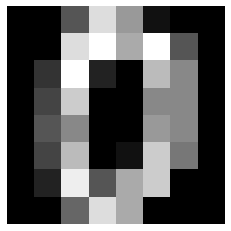

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

- 일렬로 펴진 64개 데이터를 (8,8)로 ```reshape```해주는 것을 잊지 않기

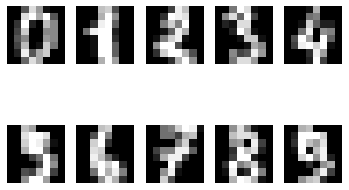

In [84]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

- 여러 개의 이미지를 한 번에 확인 가능

In [85]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- ```target``` 데이터
- 총 1797개의 데이터가 있고 0~9까지 숫자로 나타남
- 각 이미지 데이터가 어떤 숫자를 나타내는지 담고 있는 데이터

#### - 데이터가 3인지 아닌지 맞추는 문제로 변형해서 풀이

In [86]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

- ```target```인 ```digit_label```을 변형
- 기존 ```label```인 ```digits_label```에서 숫자 3 => 3, 아니라면 0을 갖게 ```new_label```을 만듦

In [91]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    new_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)


# 정확도 측정
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9638888888888889

#### '함정'
- 9개의 숫자들은 label이 모두 0, 1개 숫자만 3 => 90%의 label이 모두 0
- 정답 데이터인 label은 0이 굉장히 많고 3은 적은 불균형 데이터   

#### '이유'
- 모델을 학습하지 않고 정답을 모두 0으로만 선택해도 정확도가 90%가량 나옴

In [92]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.9055555555555556

- 길이는 ```y_pred```와 동일, 0으로 이루어진 리스트 => ```fake_pred``` 변수 저장
- ```fake_pred```와 실제 정답인 ```y_pred``` 정확도 확인

#### '결과'
- 모델 사용 안하고 답을 0으로만 찍어도 정확도가 90.5%나옴
- 이런 문제는 불균형(unbalanced) 데이터에서 많이 발생
- 정확도는 정답의 분포에 따라 모델의 성능을 잘 평가하지 못하는 척도가 될 수 있음
- 따라서, 분류 문제에서는 정확도 외에 다양한 평가 척도를 사용해야함

### 정답과 오답에도 종류가 있다!

**오차 행렬**
- [오차행렬_참고자료](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)  
<br>

#### 오차행렬 예측 결과 네 가지
1. True Positive (TP)
2. False Negative (FN)
3. False positive (FP) 
4. True Negative (TN) 
<br>

#### 오차행렬 성능 지표 다섯 가지
1. Sensitivity
2. Specificity 
3. Precision
4. Accuracy
5. F1 socre

In [93]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[317,   9],
       [  4,  30]])

- 왼쪽 위부터 순서대로 TP, FN, FP, TN의 개수를 나타냄
- 손글씨 문제에서 '0'은 Positive, '3'은 Negative
- TP와 TN의 값이 320, 18로 비교적 크고, FN, FP는 13, 9로 작음

In [95]:
confusion_matrix(y_test, fake_pred)

array([[326,   0],
       [ 34,   0]])

- 모든 숫자를 0으로 예측한 ```fake_pred```
- 모든 데이터를 0, 즉 Positive로 예측, Negative로 예측한 것은 없기에 FN & TN은 0

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       326
           3       0.77      0.88      0.82        34

    accuracy                           0.96       360
   macro avg       0.88      0.93      0.90       360
weighted avg       0.97      0.96      0.96       360



- ```0```은 개수가 333개로 많기 때문에 ```precision```과 ```recall```에서 모두 0.97, 0.96으로 높은 점수 받음
- ```3```은 27개 뿐이기에 모두 맞추기 힘듦, ```precision```과 ```recall```에서 모두 0.58, 0.67으로 낮게 나옴

In [97]:
print(classification_report(y_test, fake_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       326
           3       0.00      0.00      0.00        34

    accuracy                           0.91       360
   macro avg       0.45      0.50      0.48       360
weighted avg       0.82      0.91      0.86       360



/home/aiffel0042/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- ```0```에 대한 precision과 recall은 0.93, 1로 매우 높지만
- ```3```에 대한 precision과 recall은 둘 다 0
- ```0```은 잘 잡아내지만, ```3```은 하나도 맞추지 못함

In [99]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9638888888888889, 0.9055555555555556)

- ```y_pred```와 ```fake_pred``` 모두 0.94, 0.925로 큰 차이가 없습니다.
- 모델 성능을 정확도로만 평가하면 안됨, 특히 **label이 불균형하게 분포되어있는 데이터 조심**
- Precision과 Recall 상황에 따라 중요도 파악, 때에 맞는 성능지표 모델 평가 해야함

---

## 4. 데이터가 달라도 문제 없어요!

- load_digits : 손글씨 이미지 데이터 [링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)

- load_wine : 와인 데이터 [링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

- load_breast_cancer : 유방암 데이터 [링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

#### ```load_digits```
- 데이터의 총 개수: 1797
- feature: 64개의 픽셀값(8x8 image)
- label: 0~9 사이 숫자
<br>

#### ```oad_wine```
- 데이터의 총 개수: 178
- feature: 13개의 픽셀값
- label: 0~2 사이의 숫자